In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv("DC_train.csv")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [4]:
for col in ['Rating','Miscellaneous_Info','Place']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
df['Qualification'].unique() 

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [8]:
df['Experience'].unique() 

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [9]:
df['Rating'].unique() 

array(['100%', '98%', '99%', '79%', '95%', '97%', '94%', '88%', '90%',
       '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%', '74%',
       '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%', '60%',
       '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%', '84%',
       '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%', '40%',
       '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [10]:
df['Place'].unique() 

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [11]:
df['Profile'].unique() 

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [12]:
df['Miscellaneous_Info'].unique() 

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore',
       'Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth',
       ..., '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [13]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [14]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("*********************************************************8")
        print('\n')

Qualification : ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                488
BHMS                                               477
BAMS                                               471
MBBS                                               334
MBBS, MS - ENT                                     220
                                                  ... 
BHMS, MD - Repertory                                 1
BDS, MDS - Oral and Maxillofacial Pathology          1
BHMS, CGO, Diploma in Child Health (DCH)             1
BDS, MDS, DICOI                                      1
FCPS - Dermatology, Venereology & Leprosy, MBBS      1
Name: Qualification, Length: 1420, dt

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

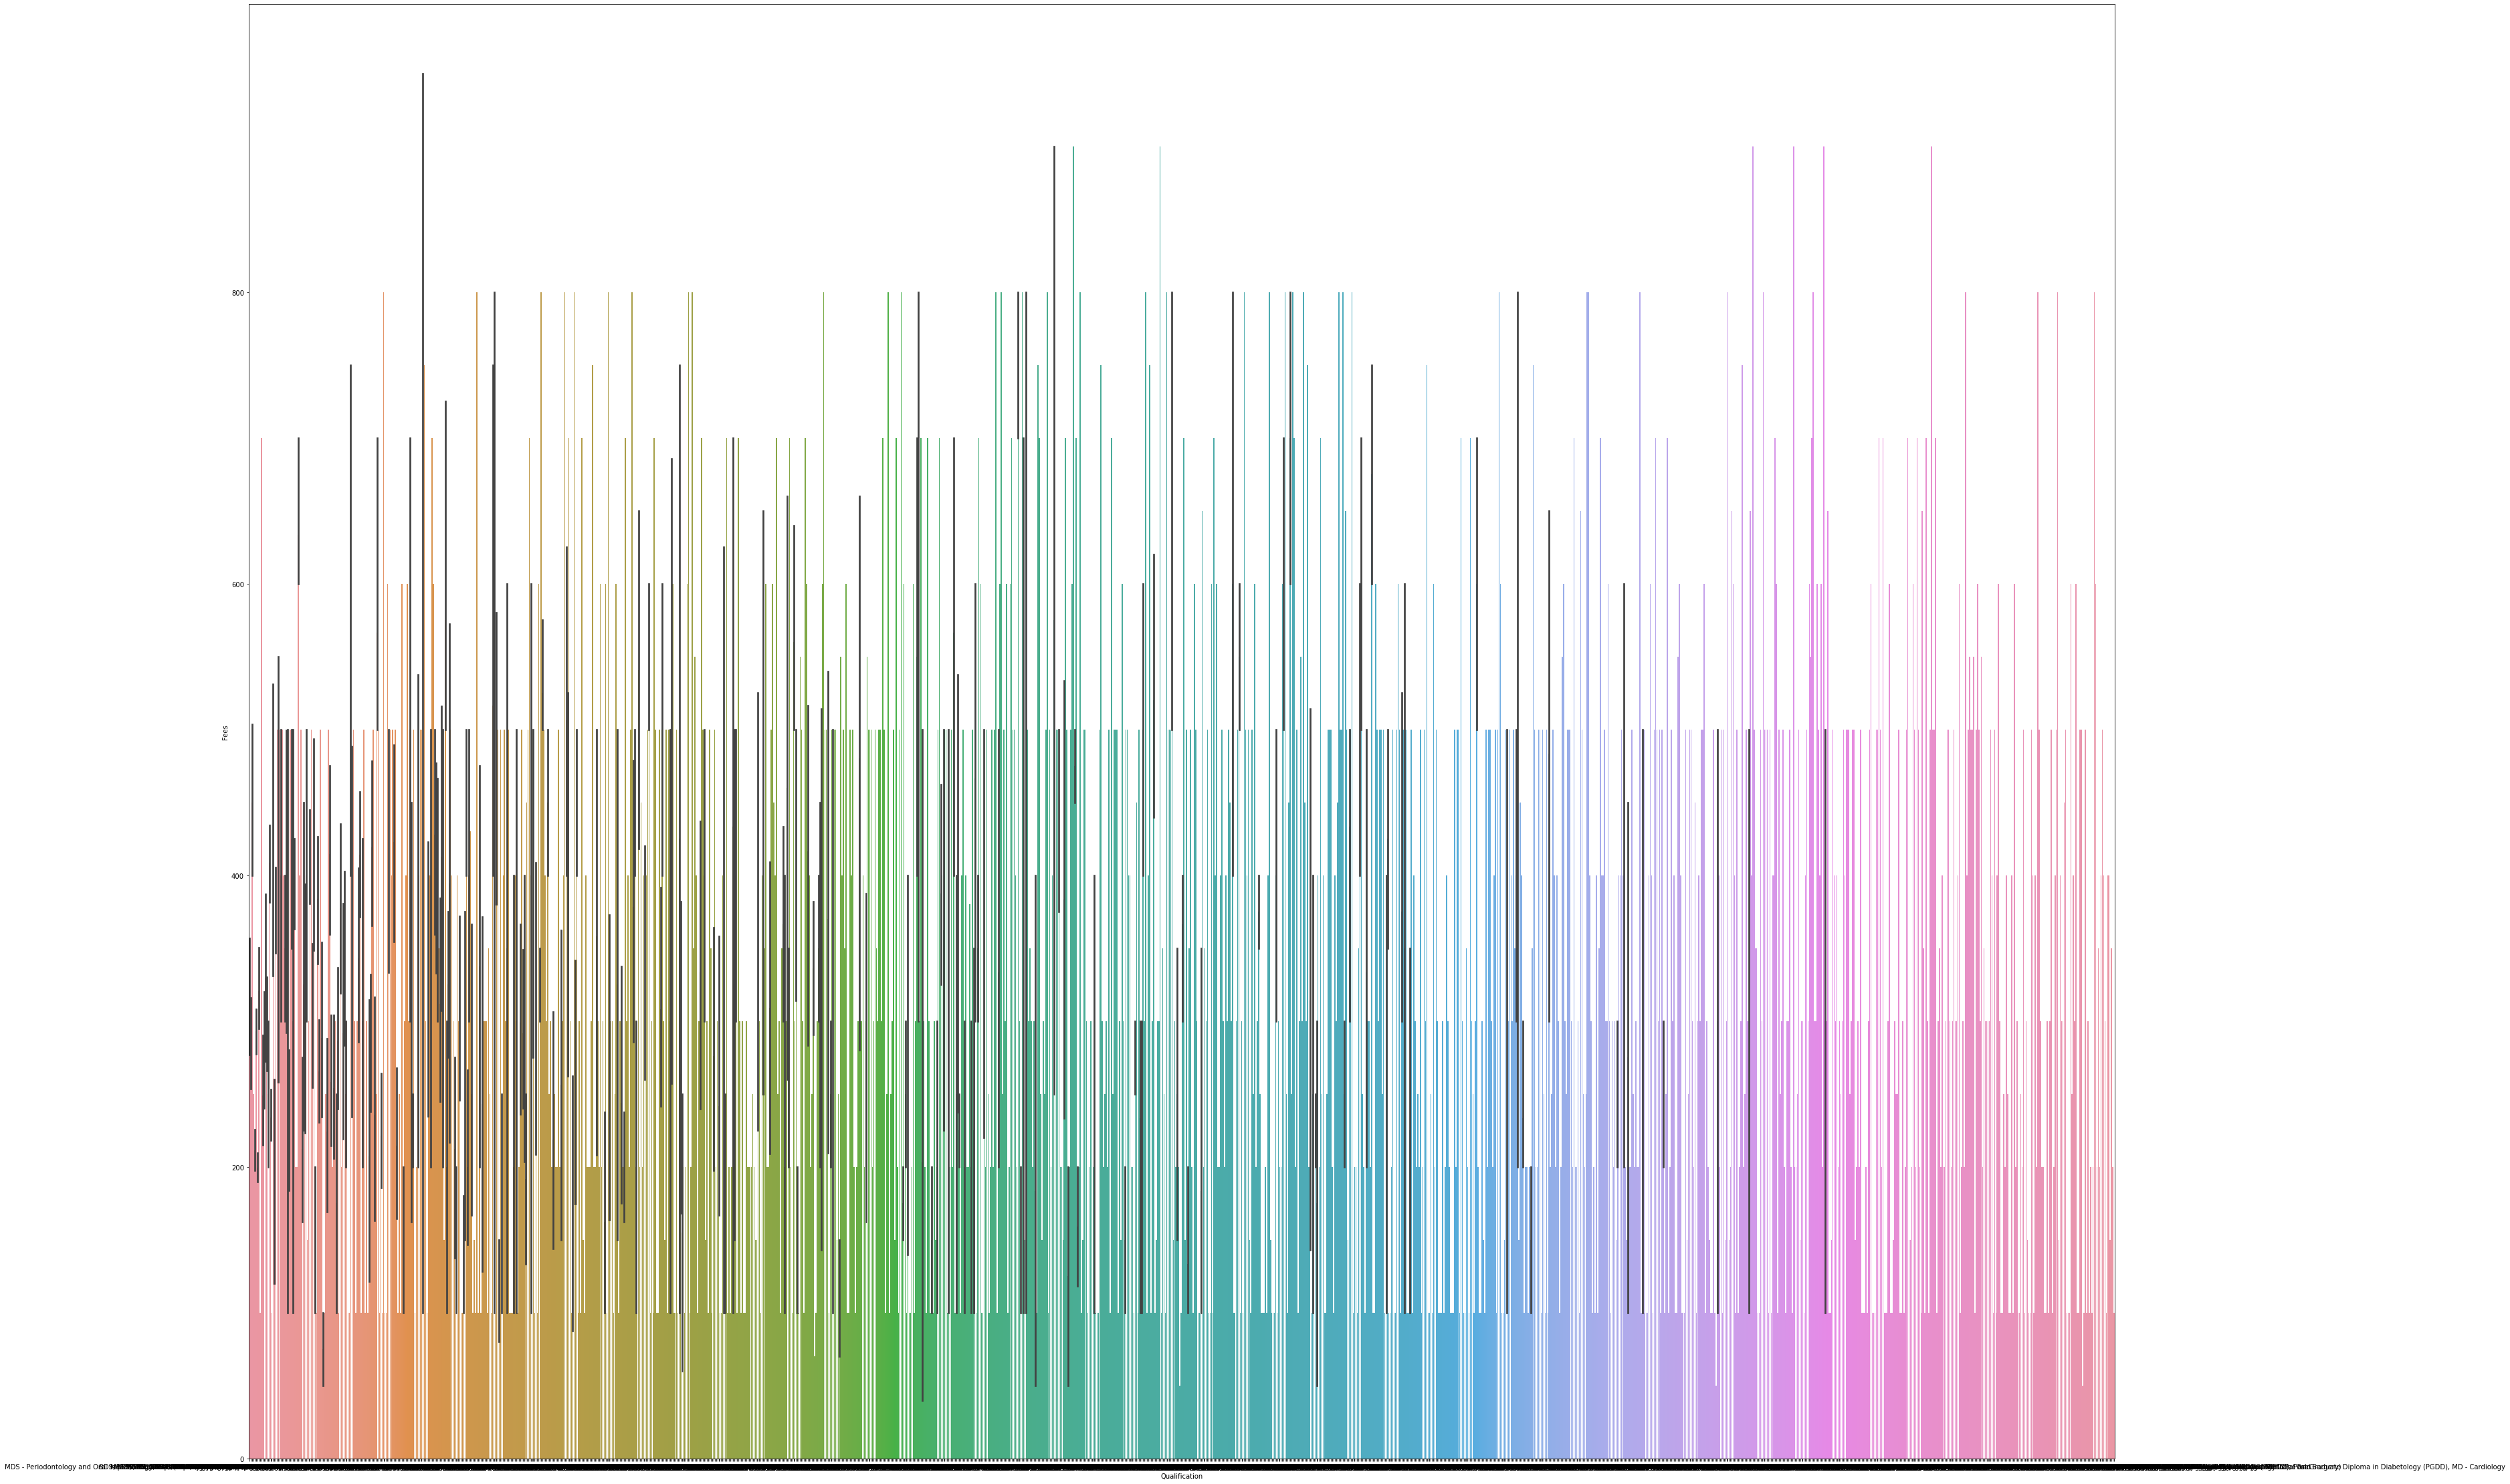

In [16]:
plt.figure(figsize=(50,40))
sns.barplot(x=df['Qualification'],y=df['Fees'])

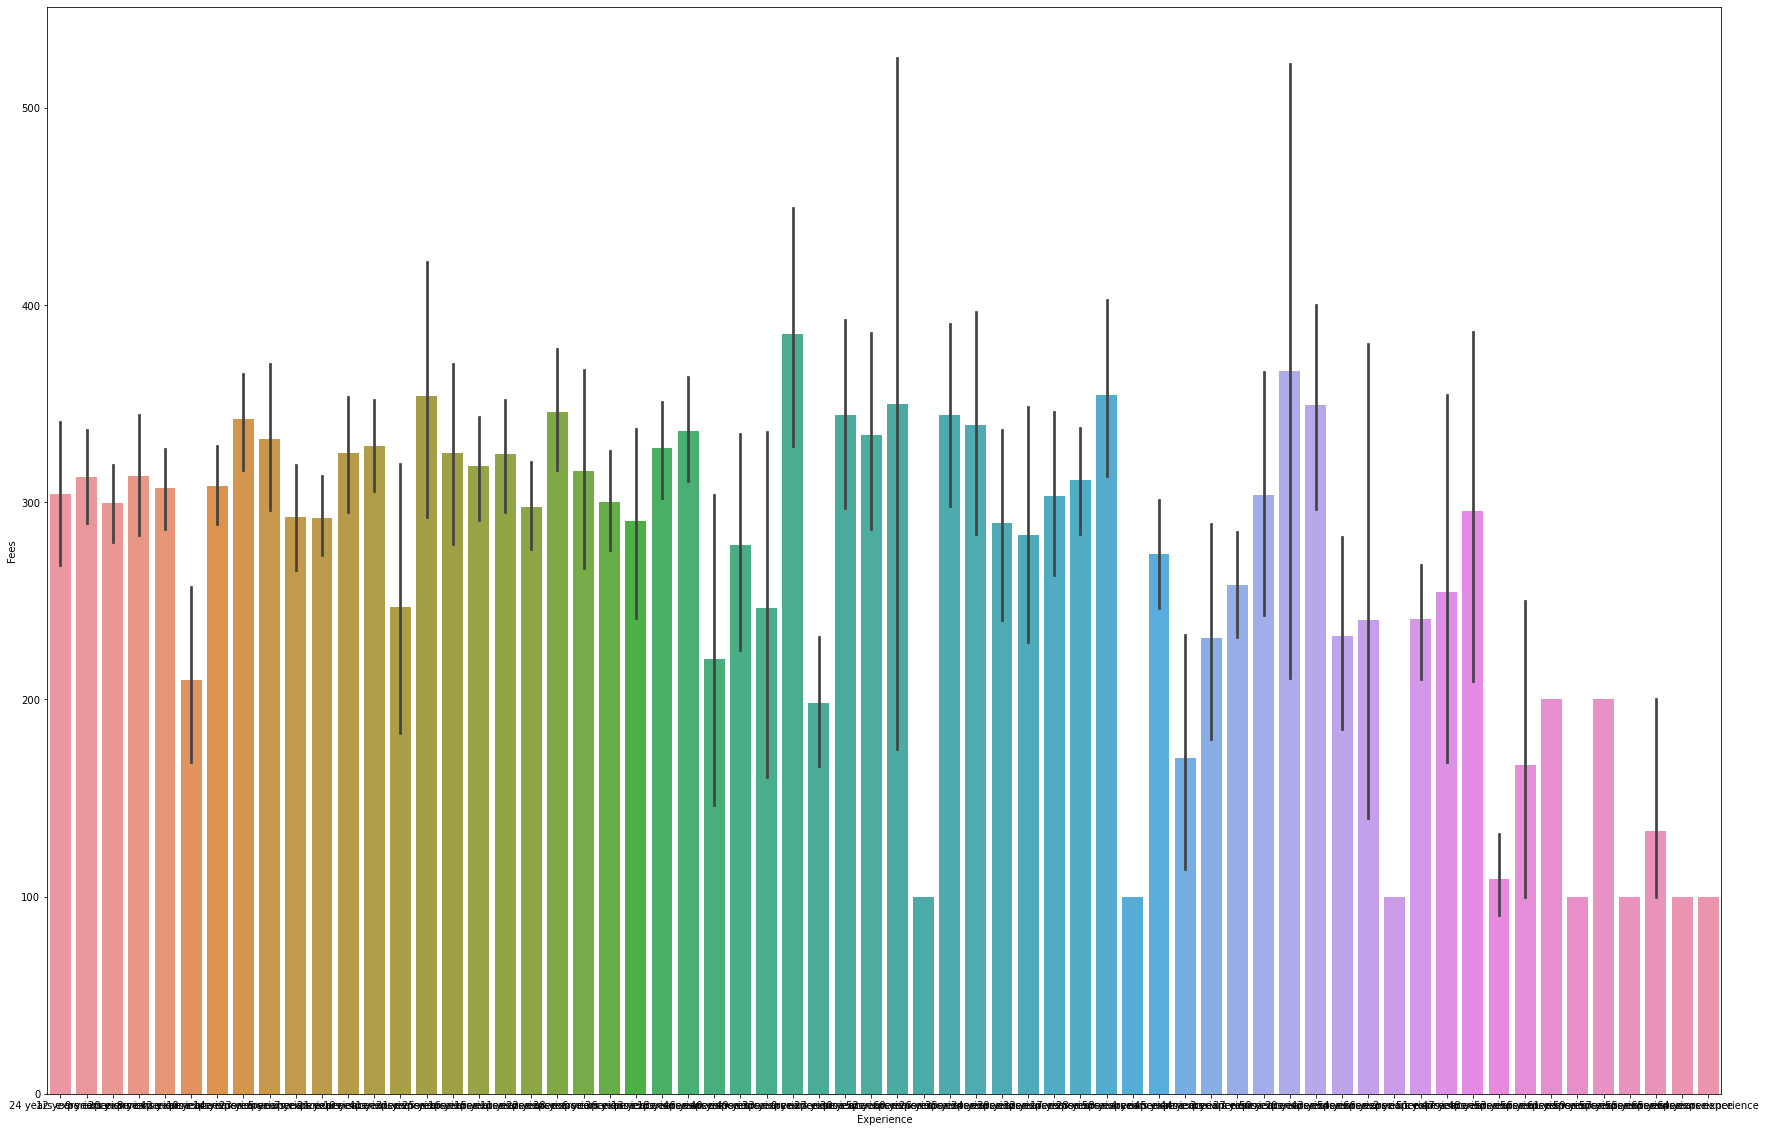

In [17]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['Experience'],y=df['Fees'])

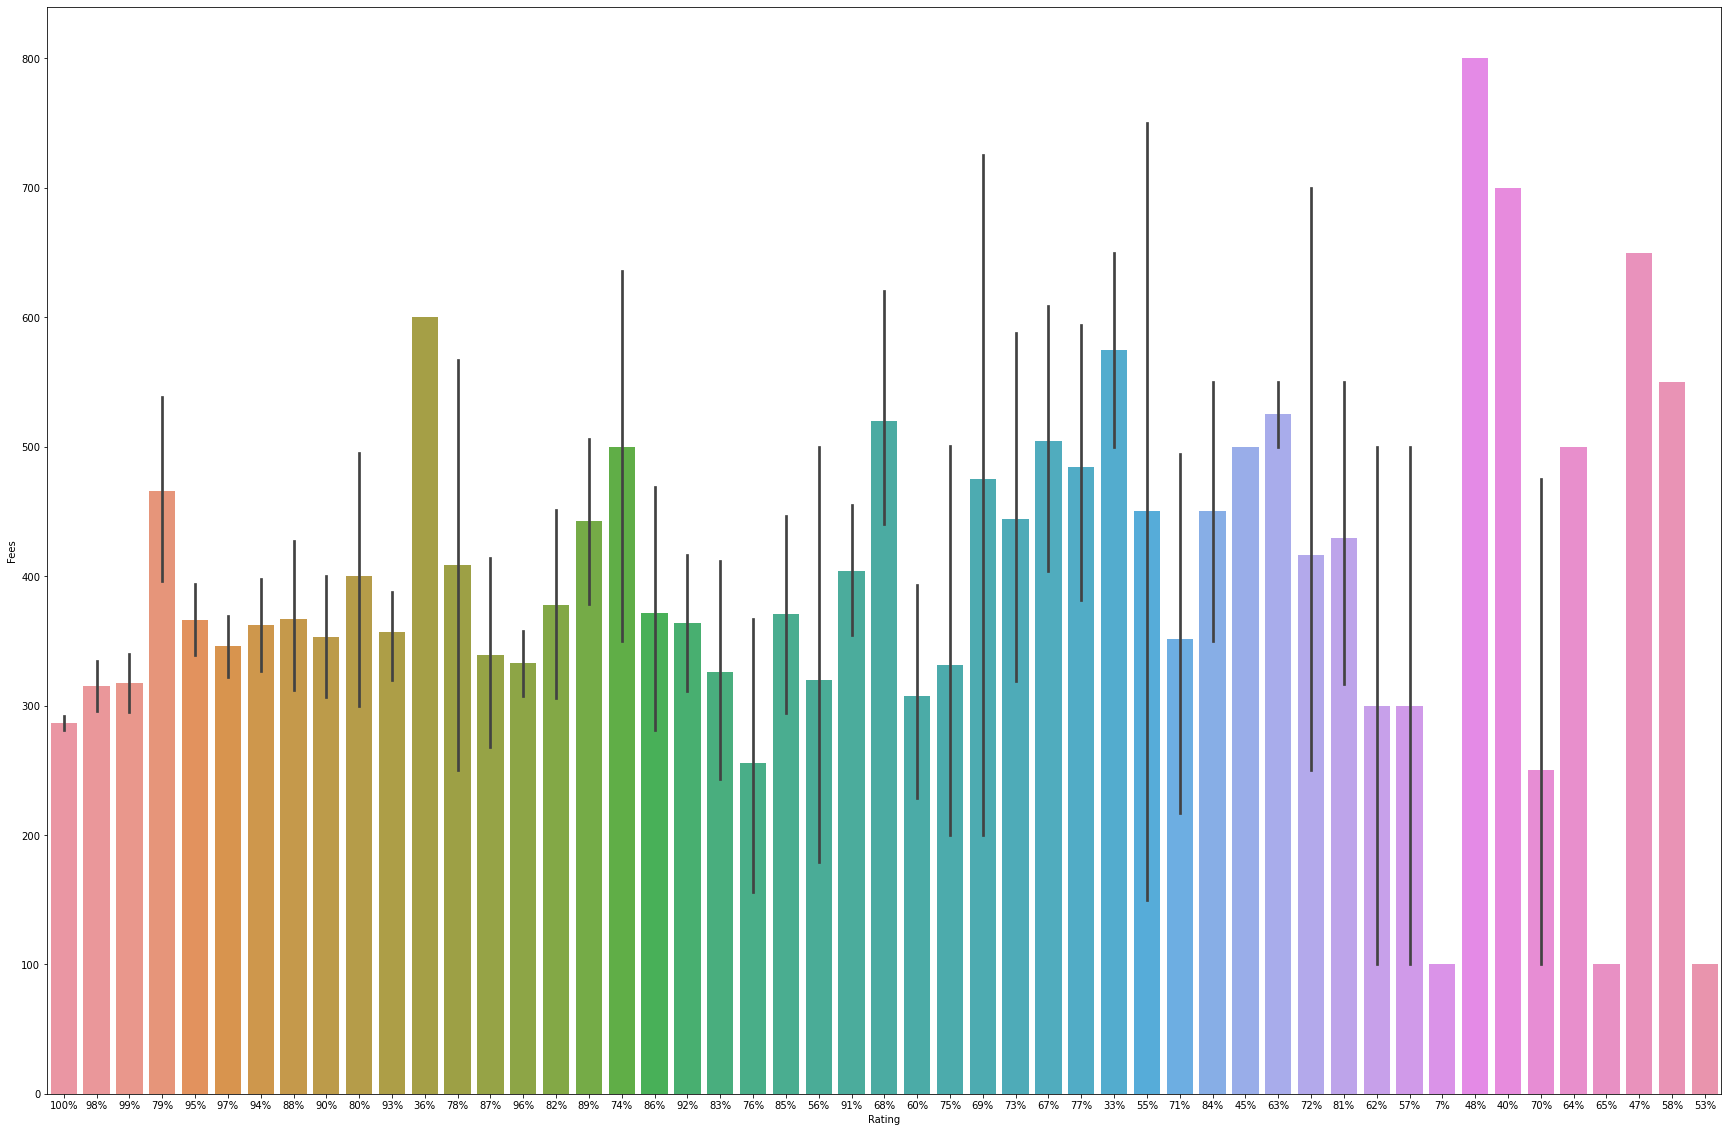

In [18]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['Rating'],y=df['Fees'])

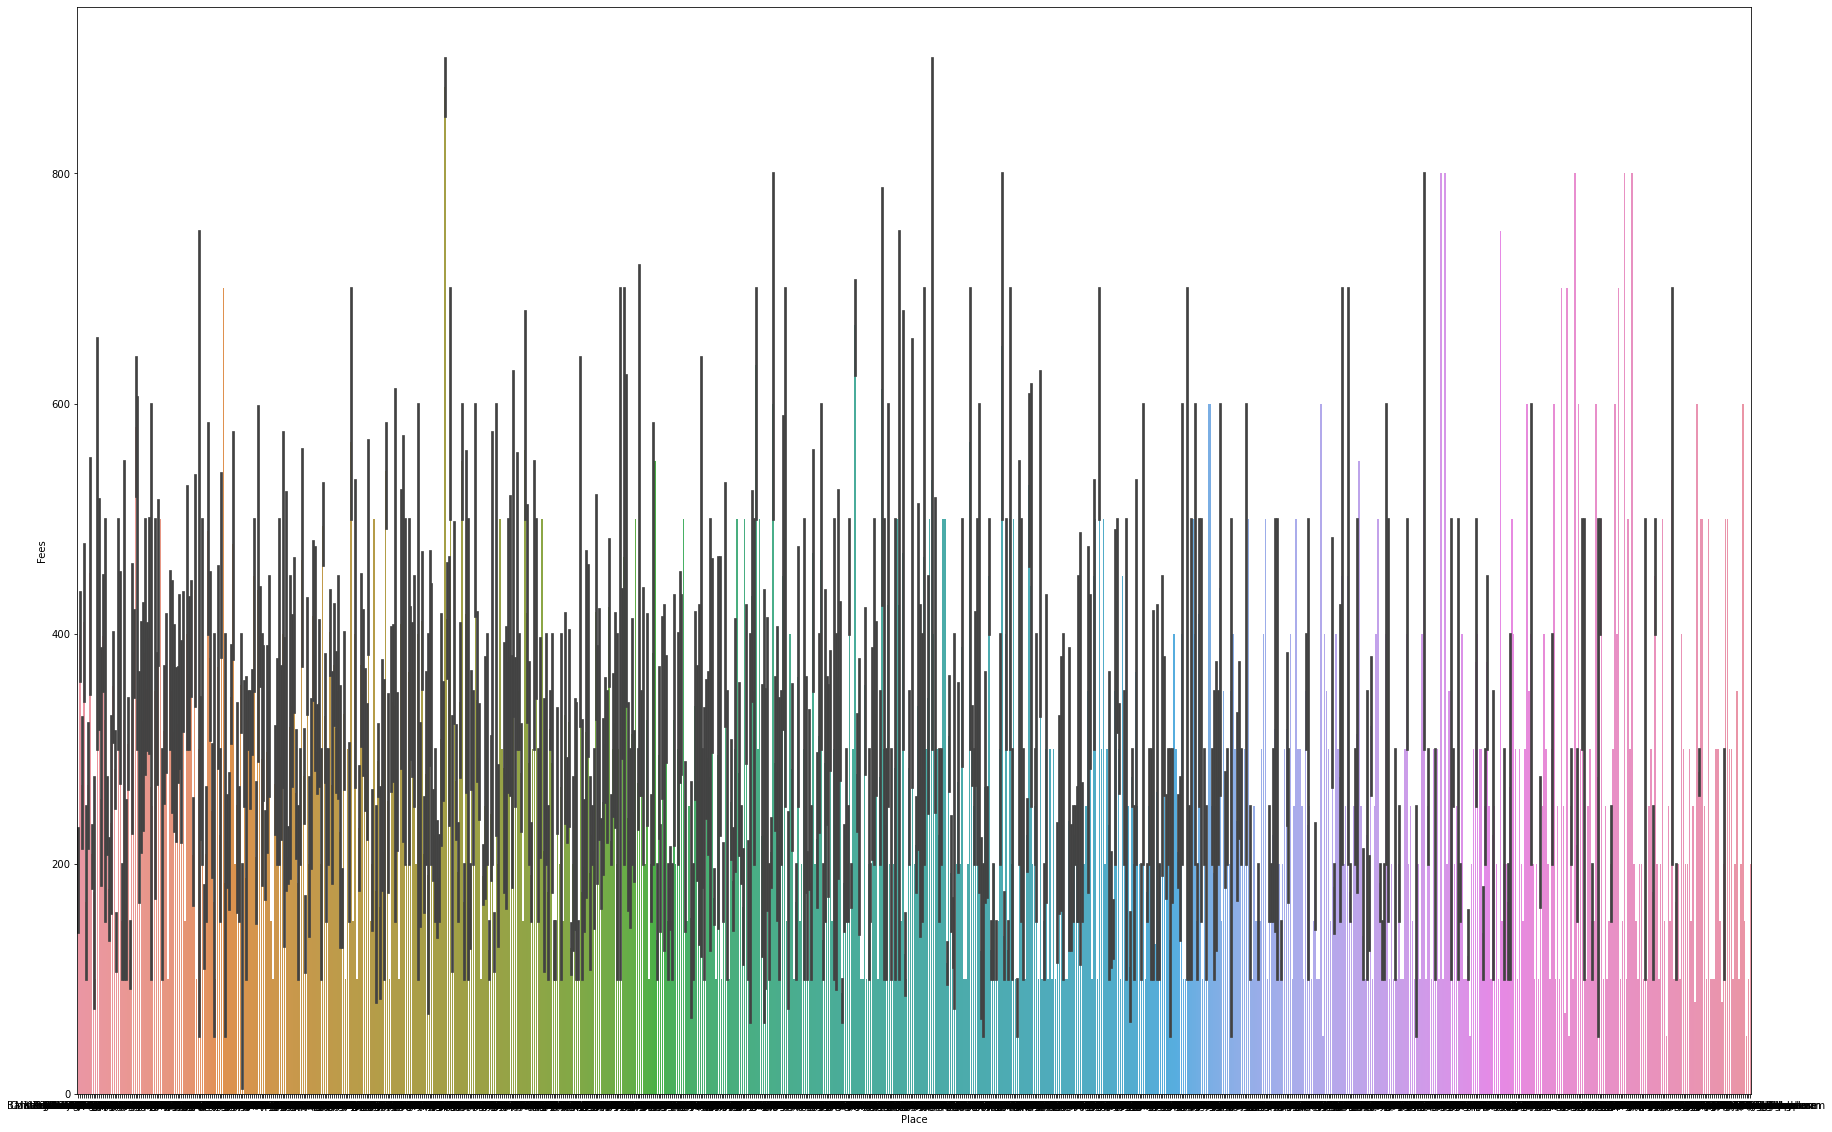

In [19]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['Place'],y=df['Fees'])

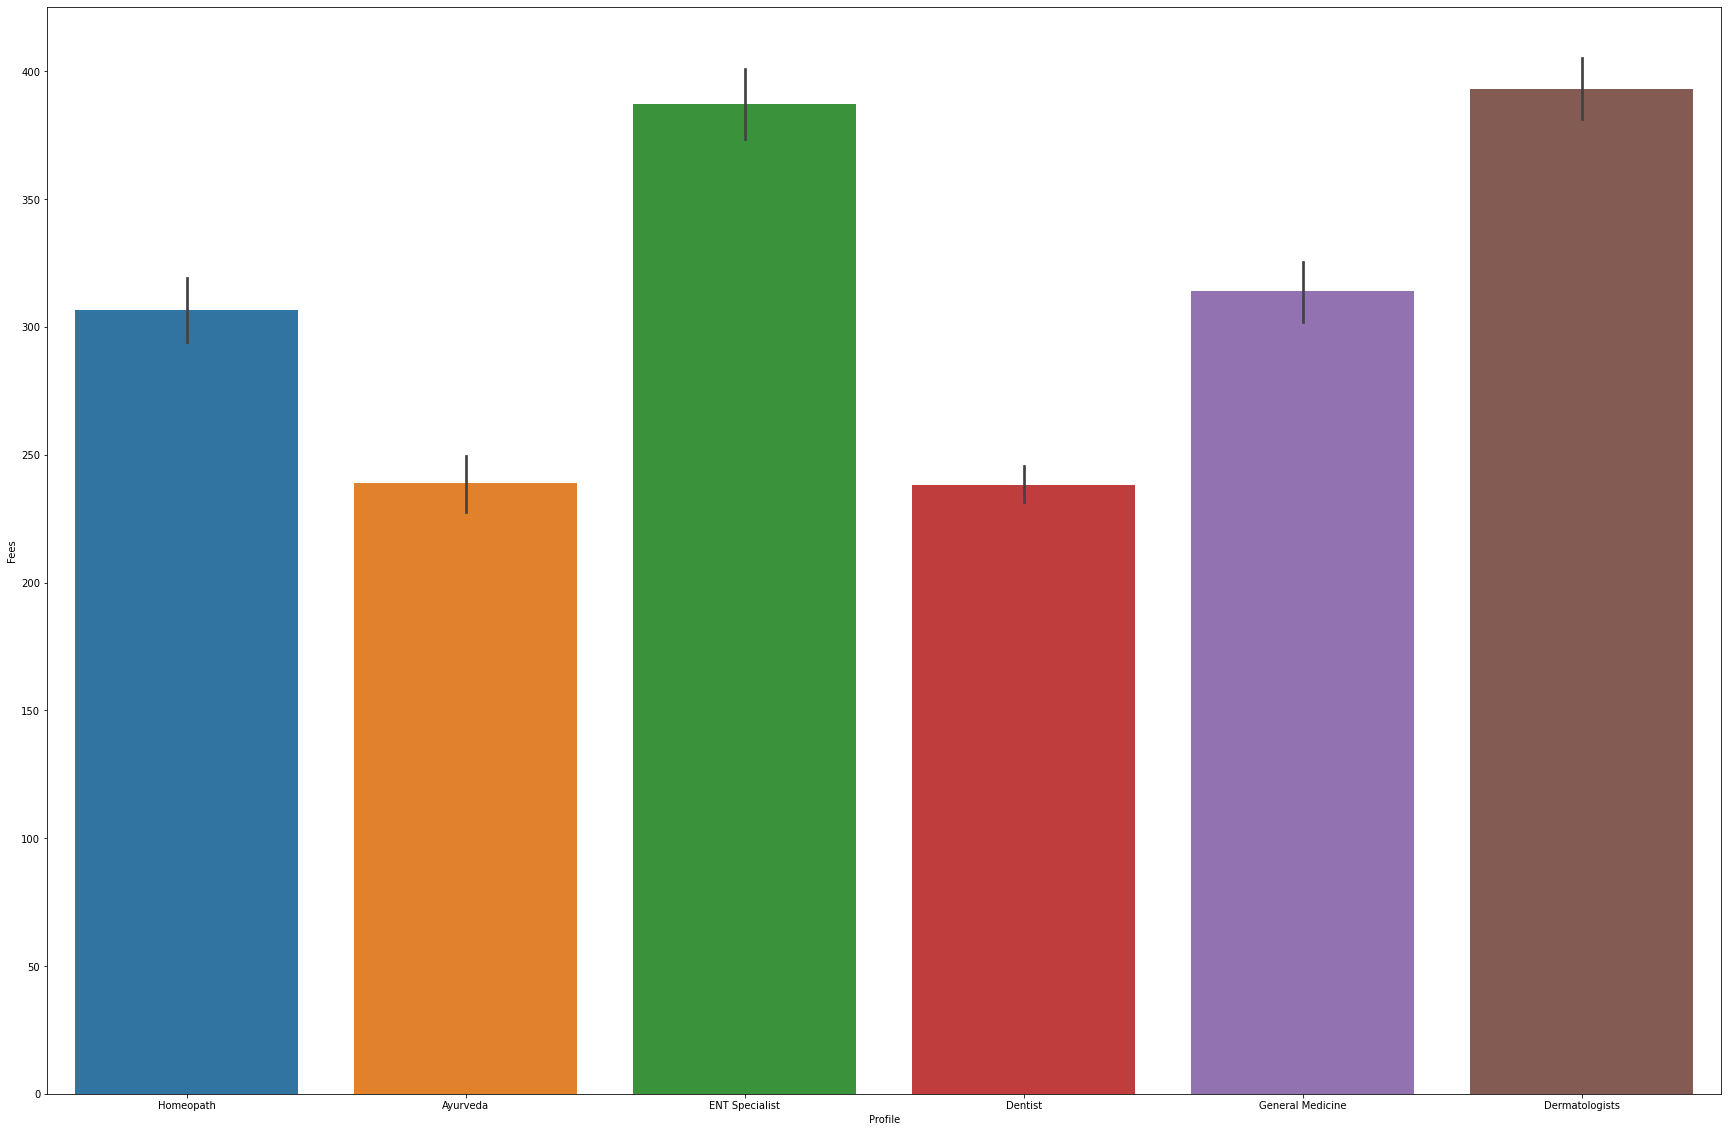

In [20]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['Profile'],y=df['Fees'])

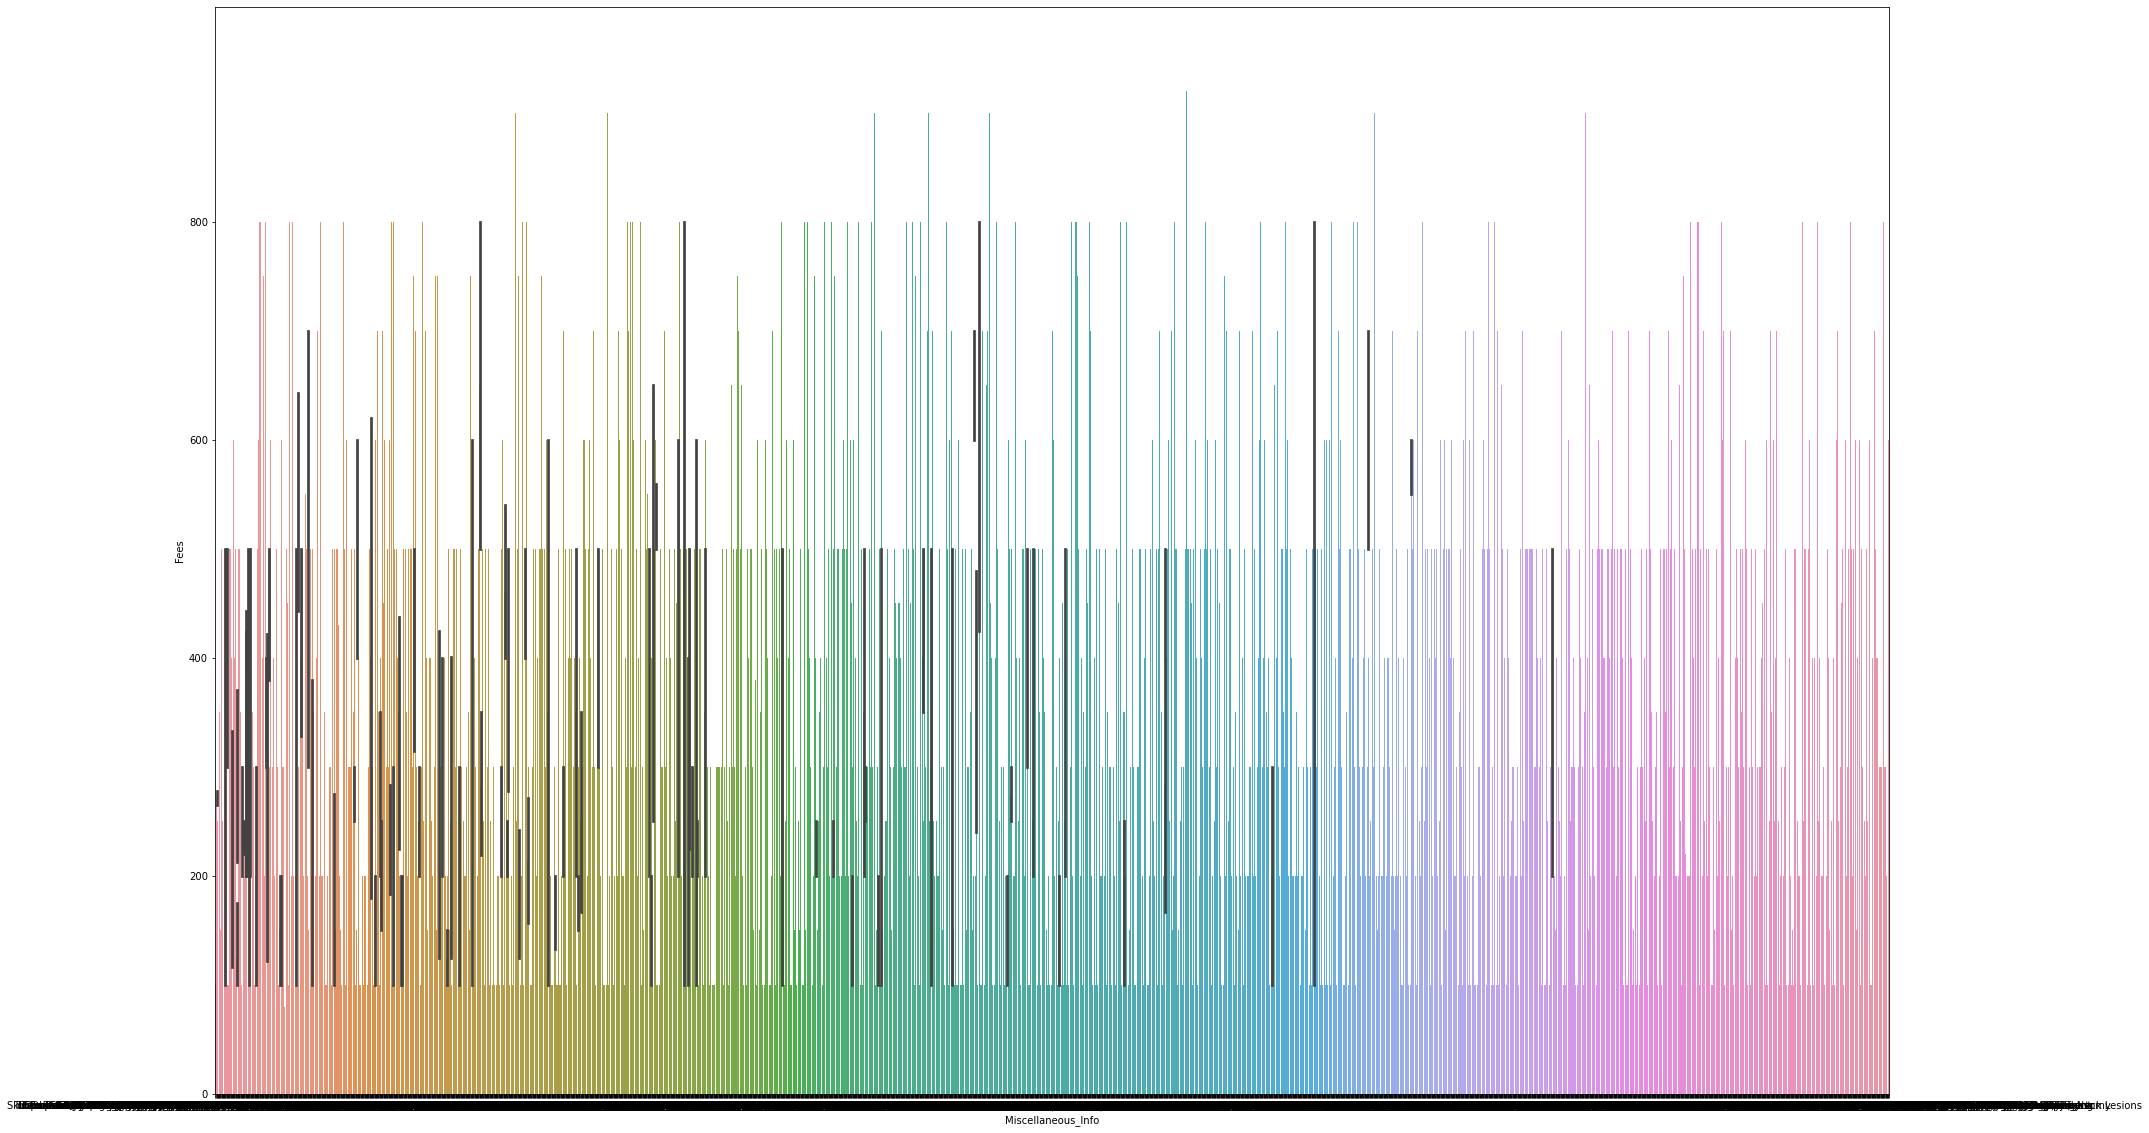

In [21]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['Miscellaneous_Info'],y=df['Fees'])

In [22]:
num_data = df['Fees'].copy()

In [23]:
num_data

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [24]:

#dfx = df[['Experience','Miscellaneous_Info']].copy()

In [25]:
df.drop(columns=['Fees'],inplace=True)

In [26]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)










In [27]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Qualification       5961 non-null   int64
 1   Experience          5961 non-null   int64
 2   Rating              5961 non-null   int64
 3   Place               5961 non-null   int64
 4   Profile             5961 non-null   int64
 5   Miscellaneous_Info  5961 non-null   int64
dtypes: int64(6)
memory usage: 279.5 KB


In [29]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401,16,0,299,5,130
1,73,3,49,866,0,1422
2,1135,63,0,457,3,1595
3,464,3,0,68,0,1695
4,10,12,0,337,0,253
...,...,...,...,...,...,...
5956,1075,10,49,70,3,1385
5957,596,26,0,541,4,1595
5958,596,35,48,216,4,1173
5959,943,6,41,850,4,2202


In [30]:
df['Rating'].unique() 

array([ 0, 49, 50, 30, 46, 48, 45, 39, 41, 31, 44,  2, 29, 38, 47, 33, 40,
       25, 37, 43, 34, 27, 36,  9, 42, 18, 12, 26, 19, 24, 17, 28,  1,  8,
       22, 35,  4, 14, 23, 32, 13, 10, 20,  6,  3, 21, 15, 16,  5, 11,  7])

In [31]:
df_new = pd.concat([df, num_data], axis=1)

In [32]:
df_new.isnull().values.any()

False

In [33]:
df_new

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100
1,73,3,49,866,0,1422,350
2,1135,63,0,457,3,1595,300
3,464,3,0,68,0,1695,250
4,10,12,0,337,0,253,250
...,...,...,...,...,...,...,...
5956,1075,10,49,70,3,1385,300
5957,596,26,0,541,4,1595,100
5958,596,35,48,216,4,1173,600
5959,943,6,41,850,4,2202,100


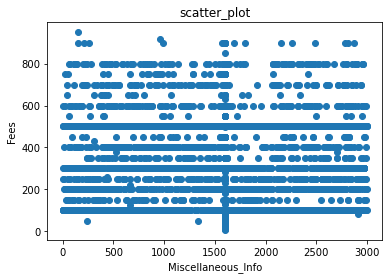

In [34]:
plt.scatter(df_new['Miscellaneous_Info'],df_new['Fees'])
plt.title("scatter_plot")
plt.xlabel('Miscellaneous_Info')
plt.ylabel("Fees")
plt.show()

In [35]:
corr=df_new.corr()

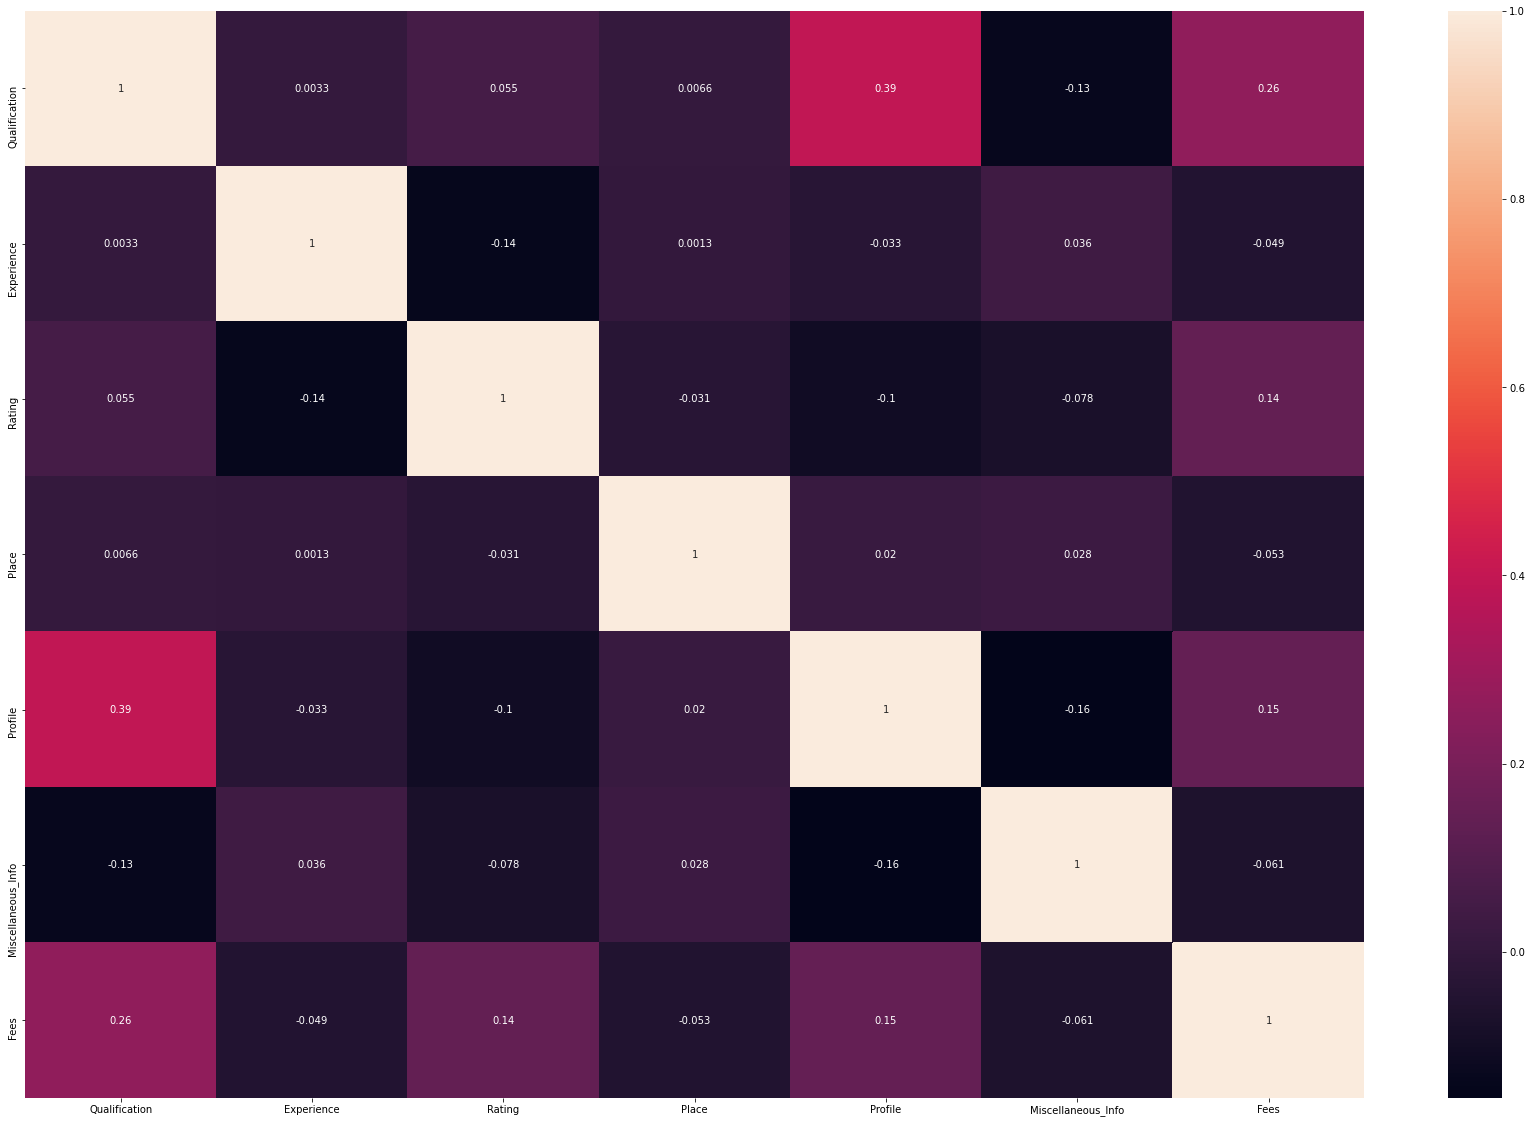

In [36]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True)
plt.show()

In [37]:
df_new1_x=df_new.drop(columns=['Fees'])

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new1_x)
x=pd.DataFrame(x,columns=df_new1_x.columns)
y=df_new['Fees']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [40]:
print(x_train.shape,'\t',x_test.shape)

(4768, 6) 	 (1193, 6)


In [41]:
print(y_train.shape,'\t',y_test.shape)

(4768,) 	 (1193,)


In [42]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [43]:
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("mean_absolute_error :", mean_absolute_error(y_test,predm))
    print("mean_squared_error :", mean_squared_error(y_test,predm))
    print("Root mean_squared_error :",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score :", r2_score(y_test,predm))
    print("*********************************************************8")
    print('\n')

Score of LinearRegression() is: 0.09232945257756109
Error:
mean_absolute_error : 146.02047185218535
mean_squared_error : 32390.016341616945
Root mean_squared_error : 179.9722654789258
r2_score : 0.09386734646369344
*********************************************************8


Score of DecisionTreeRegressor() is: 0.9986292359635272
Error:
mean_absolute_error : 168.95501536742108
mean_squared_error : 52289.09844463072
Root mean_squared_error : 228.66809669175697
r2_score : -0.4628229583131198
*********************************************************8


Score of KNeighborsRegressor() is: 0.36383919108856067
Error:
mean_absolute_error : 147.82279966471083
mean_squared_error : 35732.57424979044
Root mean_squared_error : 189.0306172285073
r2_score : 0.0003570241783538153
*********************************************************8


Score of SVR() is: 0.0696591364035698
Error:
mean_absolute_error : 142.12552989434636
mean_squared_error : 32810.495316018416
Root mean_squared_error : 181.13667578

In [44]:
#cross validation

from sklearn.model_selection import cross_val_score
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    
    
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Score of',m, 'is:')
    print("Score:" ,score)
    print("Mean score :", score.mean())
    print("standard deviation :", score.std())
    
    print("*********************************************************8")
    
    print('\n')
    
    

Score of LinearRegression() is:
Score: [0.07924355 0.10538249 0.11000753 0.07043319 0.09889634 0.08529606
 0.08164685 0.0854763  0.08796249 0.08870298]
Mean score : 0.08930477921034939
standard deviation : 0.011523865806270458
*********************************************************8


Score of DecisionTreeRegressor() is:
Score: [-0.72310913 -0.42383257 -0.67757659 -0.54740907 -0.46796111 -0.47030198
 -0.55401479 -0.63637383 -0.65268156 -0.51385098]
Mean score : -0.5667111608293068
standard deviation : 0.0958038767127522
*********************************************************8


Score of KNeighborsRegressor() is:
Score: [ 0.05044652 -0.0084256   0.09024775  0.00777712  0.08714788  0.08136136
  0.03978834  0.00868888  0.00265814 -0.01856311]
Mean score : 0.034112728929309374
standard deviation : 0.03925415527664894
*********************************************************8


Score of SVR() is:
Score: [0.07949114 0.0790755  0.08261281 0.04148379 0.07072884 0.08990052
 0.05774961 0.037

In [45]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[400,700],'max_depth':[4,20]}

RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 700}


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)

rf.fit(x_train,y_train)
print("Score:" ,rf.score(x_train,y_train))
print('\n')
pred = rf.predict(x_test)
r2_sc = r2_score(y_test,pred)
print("r2_sc =", r2_sc*100)
print('\n')
print("mean_absolute_error :", mean_absolute_error(y_test,pred))
print("mean_squared_error :", mean_squared_error(y_test,pred))
print("Root mean_squared_error :",np.sqrt(mean_squared_error(y_test,pred)))
print('\n')

Score: 0.604953068460049


r2_sc = 17.97590813209763


mean_absolute_error : 133.34628596294743
mean_squared_error : 29319.7874024214
Root mean_squared_error : 171.23021755058713




Text(0, 0.5, 'predicted values')

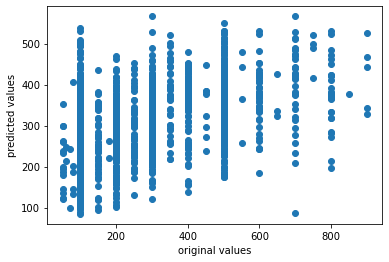

In [47]:
original_values = y_test
predicted_values = pred

plt.scatter(original_values,predicted_values)
plt.xlabel("original values")
plt.ylabel("predicted values")

In [48]:
import pickle

filename = 'pickledrffile5.pkl'
pickle.dump(rf, open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

loaded_model.predict(x)

array([265.90930745, 347.693225  , 380.60790623, ..., 419.58016973,
       250.86733005, 178.05482979])

test data 

In [49]:
test_df = pd.read_csv("DC_test.csv")

In [50]:
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [51]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [52]:
for col in ['Rating','Miscellaneous_Info','Place']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

In [53]:
test_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              1987 non-null   object
 3   Place               1987 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1987 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [55]:
import pandas as pd

def clean_dataset(test_df):
    assert isinstance(test_df, pd.DataFrame), "test_df needs to be a pd.DataFrame"
    test_df.dropna(inplace=True)
    indices_to_keep = ~test_df.isin([np.nan, np.inf, -np.inf]).any(1)
    return test_df[indices_to_keep].astype(np.float64)


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in test_df.columns:
    if test_df[column].dtype==np.number:
        continue
    test_df[column]=le.fit_transform(test_df[column])

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Qualification       1987 non-null   int64
 1   Experience          1987 non-null   int64
 2   Rating              1987 non-null   int64
 3   Place               1987 non-null   int64
 4   Profile             1987 non-null   int64
 5   Miscellaneous_Info  1987 non-null   int64
dtypes: int64(6)
memory usage: 93.3 KB


In [57]:
fitted_model = pickle.load(open('pickledrffile5.pkl',"rb"))

In [58]:
fitted_model

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [59]:
predictions = fitted_model.predict(test_df)

In [60]:
predictions

array([399.09393047, 399.09393047, 384.94545402, ..., 399.09393047,
       382.90304228, 399.09393047])

In [61]:
import pandas as pd 

df5 = pd.DataFrame(predictions, columns = ['ouput'])

In [62]:
df5['ouput'].unique()

array([399.09393047, 384.94545402, 388.79947262, 398.74534443,
       382.90304228, 377.43758594, 395.83730195, 379.78705254,
       385.53503106, 396.69983704, 377.62960029, 394.25401625,
       393.92780071, 395.80176002, 369.05930923, 381.12074305,
       338.6332563 , 360.66146843, 363.3050947 , 340.82623141,
       349.43604011, 368.9435134 , 395.3992768 , 390.60278517,
       390.3122696 , 383.90619342])